In [2]:
!pip install langgraph langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 2.4 MB/s eta 0:00:00


In [9]:
from langgraph.graph import StateGraph , START  , END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict

In [4]:
from google.colab import userdata
api_key = userdata.get('GOOGLE_API_KEY')

In [6]:
model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash"
    , api_key= api_key)

# State creation

In [7]:
class LLMState(TypedDict):
  question : str
  answer : str

In [8]:
def llm_qa(state : LLMState) -> LLMState:
  # extract question from state
  question = state["question"]

  # form a prompt
  prompt = f"Answer the following question: {question}"

  # ask that question to llm
  answer = model.invoke(prompt).content

  # update answer in state
  state['answer'] = answer

  return state

In [12]:
#create graph
graph = StateGraph(LLMState)

# add nodes
graph.add_node("llm_qa" , llm_qa)

# add edge
graph.add_edge(START , "llm_qa")
graph.add_edge("llm_qa" , END)

#compile
workflow = graph.compile()


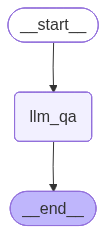

In [13]:
graph.compile()

In [14]:
initial_state = {
    'question': "How is AI mentor better than Human mentor? "
}

In [15]:
final_state = workflow.invoke(initial_state)

In [16]:
print(final_state)

{'question': 'How is AI mentor better than Human mentor? ', 'answer': 'While AI mentors offer distinct advantages in certain areas, it\'s crucial to understand that they are not inherently "better" than human mentors across the board. Instead, they excel in different aspects, making them complementary rather than strictly superior.\n\nHere\'s how an AI mentor can be considered "better" in specific contexts:\n\n1.  **24/7 Availability and Instant Access:**\n    *   **AI Advantage:** An AI mentor is always online, never sleeps, and can provide assistance or information immediately, regardless of time zones or scheduling conflicts. You don\'t have to wait for an appointment.\n    *   **Human Limitation:** Human mentors have limited time, personal lives, and can only meet during specific hours.\n\n2.  **Scalability and Consistency:**\n    *   **AI Advantage:** An AI can mentor an unlimited number of individuals simultaneously, delivering consistent quality and information every single time

In [17]:
print(final_state['answer'])

While AI mentors offer distinct advantages in certain areas, it's crucial to understand that they are not inherently "better" than human mentors across the board. Instead, they excel in different aspects, making them complementary rather than strictly superior.

Here's how an AI mentor can be considered "better" in specific contexts:

1.  **24/7 Availability and Instant Access:**
    *   **AI Advantage:** An AI mentor is always online, never sleeps, and can provide assistance or information immediately, regardless of time zones or scheduling conflicts. You don't have to wait for an appointment.
    *   **Human Limitation:** Human mentors have limited time, personal lives, and can only meet during specific hours.

2.  **Scalability and Consistency:**
    *   **AI Advantage:** An AI can mentor an unlimited number of individuals simultaneously, delivering consistent quality and information every single time. It doesn't have bad days or get tired.
    *   **Human Limitation:** A human ment

# Blog generation workflow using prompt chaining

In [31]:
class BlogState(TypedDict):
  title : str
  outline : str
  content: str


In [32]:
def create_outline(state : BlogState) -> BlogState:
  # fetch_title
  title = state['title']
  prompt=f'generate a outline for the topic : {title}'
  outline = model.invoke(prompt).content
  state['outline'] = outline
  return state

In [38]:
def create_blog(state: BlogState) -> BlogState:
  title = state['title']
  outline = state['outline']
  prompt = f'Write a detailed blog on the title - {title} using the following outline \n {outline}'
  content = model.invoke(prompt).content
  state['content'] = content
  return state


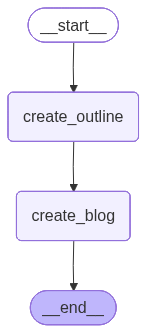

In [39]:
graph = StateGraph(BlogState)

graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

graph.add_edge(START , 'create_outline')
graph.add_edge('create_outline' , 'create_blog')
graph.add_edge('create_blog' , END)

graph.compile()



In [40]:
workflow = graph.compile()

In [41]:
initial_state = {'title': 'rise of britishers in india '}
final_state= workflow.invoke(initial_state)
print(final_state['outline'])

Here's an outline for the topic "Rise of Britishers in India":

**Topic: The Rise of Britishers in India: From Traders to Rulers**

**I. Introduction**
    A. Brief overview of India's pre-colonial wealth and geopolitical landscape
    B. Arrival of European trading companies (Portuguese, Dutch, French, British)
    C. Thesis Statement: How the British East India Company (EIC) transformed from a mere trading entity into the paramount political and military power in India by the mid-19th century.

**II. Early European Presence and Competition (16th - 17th Century)**
    A. Lure of India: Spices, textiles, raw materials
    B. Establishment of European trading posts (factories)
        1. Portuguese: Goa, Daman, Diu
        2. Dutch: Pulicat, Surat
        3. French: Pondicherry, Chandernagore
        4. British East India Company (EEC): Surat (1612), Madras (1639), Bombay (1668), Calcutta (1690)
    C. Nature of early British presence: Primarily commercial, seeking trade monopolies

**I

In [42]:
print(final_state['content'])

## The Rise of Britishers in India: From Traders to Rulers

India, a land of fabled riches, vibrant cultures, and intricate geopolitical tapestries, stood as a beacon of prosperity long before the advent of European powers. Its spices, textiles, precious stones, and advanced craftsmanship drew merchants from across the globe, creating a bustling hub of international trade. However, this very allure, coupled with internal shifts in power, would inadvertently pave the way for a dramatic transformation – the ascendancy of a foreign entity that would evolve from a humble trading company into the ultimate sovereign.

This blog delves into the fascinating and often tumultuous journey of the British East India Company (EIC), tracing its evolution from a mere commercial enterprise to the paramount political and military power in India by the mid-19th century, fundamentally reshaping the subcontinent's destiny.

### I. Early European Presence and the Lure of India (16th - 17th Century)

The irr